<a href="https://colab.research.google.com/github/MIPTwastaken/MLgym/blob/main/hw_1_game_of_thrones_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

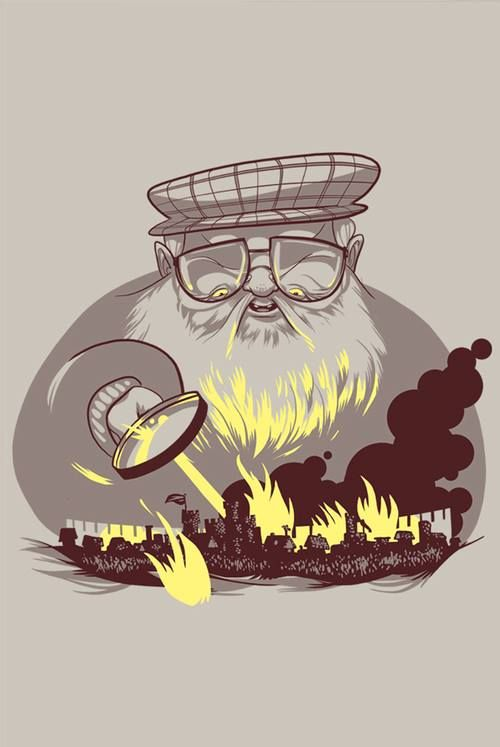

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 44.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 73.4MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data.head(10)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
6,Tommen Baratheon,NaN,1,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
7,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,...,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
8,Viserys I Targaryen,NaN,1,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
9,Wilbert,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0


In [5]:
data.drop('name', axis=1, inplace=True)

In [6]:
data_test.drop('name', axis=1, inplace=True)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [7]:
na_ratio_percent = (data.isna().sum() / len(data)) * 100
print(na_ratio_percent)

# Пока ничего не удаляю, потом мб

title               53.949904
male                 0.000000
culture             68.657675
dateOfBirth         82.080925
mother              98.843931
father              98.587026
heir                98.651252
house               24.470135
spouse              87.154785
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother       98.843931
isAliveFather       98.587026
isAliveHeir         98.651252
isAliveSpouse       87.154785
isMarried            0.000000
isNoble              0.000000
age                 82.080925
numDeadRelations     0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [8]:
data['isPopular'] = (data['popularity'] > 0.063545).astype(int)

In [9]:
data_test['isPopular'] = (data_test['popularity'] > 0.063545).astype(int)

In [10]:
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

In [11]:
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)

In [12]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands', 'westeros','westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Lhazareen' : ['lhazareen'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen', 'northern mountain clans'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen', 'ironborn'],
    'Vale mountain clans' : ['vale mountain clans','valemen', 'vale'],
}

def simplify_culture(culture):
    if pd.isna(culture):
        return culture
    lower_culture = culture.lower().strip()
    for canonical, variants in cult.items():
        if lower_culture in variants:
            return canonical
    return culture

data['culture'] = data['culture'].apply(simplify_culture)

In [13]:
data_test['culture'] = data_test['culture'].apply(simplify_culture)

In [14]:
unique_cultures = data_test['culture'].dropna().unique().tolist()
print(len(unique_cultures), *unique_cultures, sep='\n')

32
Asshai
Riverlands
Naathi
Free Folk
Rivermen
Dornish
Ironborn
Rhoynar
Vale mountain clans
Westermen
Dothraki
Northmen
Ghiscari
Meereen
Valyrian
Norvoshi
Reach
Stormlander
Braavosi
Meereenese
Lysene
Tyroshi
Pentoshi
Wildlings
Crannogmen
Lhazareen
Qohor
Astapor
Ibbenese
Myrish
Qartheen
Summer Islands


In [15]:
unique_cultures = data['culture'].dropna().unique().tolist()
print(len(unique_cultures), *unique_cultures, sep='\n')

28
Rivermen
Dornish
Valyrian
Ironborn
Free Folk
Northmen
Summer Islands
Braavosi
Dothraki
Ghiscari
Vale mountain clans
Reach
Tyroshi
Lhazarene
Qartheen
Lysene
Westermen
Qohor
Norvoshi
Meereenese
Andal
Astapori
Stormlander
Myrish
Lhazareen
Sistermen
Crannogmen
Pentoshi


In [16]:
data['book3__book4'] = data['book3'] + data['book4']
data['book2__book4'] = data['book2'] + data['book4']
data['book12345'] = data['book1'] + data['book5'] + data['book3'] + data['book2'] + data['book4']

In [17]:
data_test['book3__book4'] = data_test['book3'] + data_test['book4']
data_test['book2__book4'] = data_test['book2'] + data_test['book4']
data_test['book12345'] = data_test['book1'] + data_test['book5'] + data_test['book3'] + data_test['book2'] + data_test['book4']

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [19]:
# data.drop(columns=[...], inplace = True)

target = data['isAlive']

features = data.drop(columns=['isAlive'])

numeric_cols = features.select_dtypes(include=np.number).columns.tolist()
categorical_cols = features.select_dtypes(include='object').columns.tolist()

features[numeric_cols] = features[numeric_cols].fillna(features[numeric_cols].median())
features[categorical_cols] = features[categorical_cols].fillna('Missing')

le = LabelEncoder()
for col in categorical_cols:
    features[col] = le.fit_transform(features[col])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
feat_importances = pd.Series(importances, index=features.columns)
feat_importances = feat_importances.sort_values(ascending=False)

print("насколько важна фича:")
print(feat_importances)

насколько важна фича:
popularity           0.229587
house                0.160711
culture              0.070918
dateOfBirth          0.069128
title                0.065067
book4                0.050565
book12345            0.045626
age                  0.037725
isPopular            0.031502
male                 0.028503
spouse               0.028099
isNoble              0.025531
book3__book4         0.022893
book5                0.022643
book2__book4         0.021591
book1                0.019401
book2                0.013165
book3                0.012261
numDeadRelations     0.011009
isMarried            0.009688
father               0.008729
isAliveSpouse        0.004569
boolDeadRelations    0.004374
mother               0.002451
heir                 0.002200
isAliveHeir          0.000983
isAliveFather        0.000681
isAliveMother        0.000399
dtype: float64


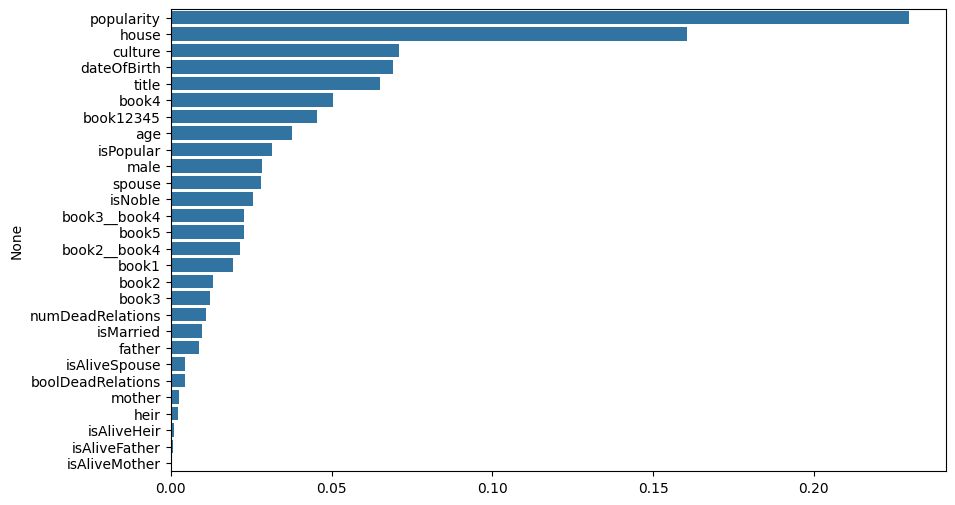

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.show()

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [22]:
# ...
counts = data['isAlive'].value_counts()
print("Абсолютное количество по классам:")
print(counts)

percentages = data['isAlive'].value_counts(normalize=True) * 100
print("\nПроцентное соотношение по классам:")
print(percentages)

Абсолютное количество по классам:
isAlive
1    1212
0     345
Name: count, dtype: int64

Процентное соотношение по классам:
isAlive
1    77.842004
0    22.157996
Name: proportion, dtype: float64


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [23]:
data['hasFather'] = data['father'].notna().astype(int)
data['hasMother'] = data['mother'].notna().astype(int)
data['hasHeir']   = data['heir'].notna().astype(int)
data['hasSpouse'] = data['spouse'].notna().astype(int)

cols_alive = ['isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse']
for col in cols_alive:
    data[col] = data[col].fillna(-1)

data.drop(['father','mother','heir','spouse'], axis=1, inplace=True)

In [24]:
data_test['hasFather'] = data_test['father'].notna().astype(int)
data_test['hasMother'] = data_test['mother'].notna().astype(int)
data_test['hasHeir']   = data_test['heir'].notna().astype(int)
data_test['hasSpouse'] = data_test['spouse'].notna().astype(int)

for col in cols_alive:
    data_test[col] = data_test[col].fillna(-1)

data_test.drop(['father','mother','heir','spouse'], axis=1, inplace=True)

In [25]:
mean_value = data['age'].mean()
median_value = data['age'].median()

print(mean_value, median_value)

data['age'] = data['age'].fillna(median_value)
data_test['age'] = data_test['age'].fillna(median_value)

35.29032258064516 24.0


In [26]:
mean_value = data['dateOfBirth'].mean()
median_value = data['dateOfBirth'].median()

print(mean_value, median_value)

data['dateOfBirth'] = data['dateOfBirth'].fillna(median_value - 5)
data_test['dateOfBirth'] = data_test['dateOfBirth'].fillna(median_value - 5)


247.55197132616487 272.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [27]:
corr_matrix = data[numeric_cols + ['isAlive']].corr()
print(corr_matrix['isAlive'].sort_values(ascending=False))

isAlive              1.000000
dateOfBirth          0.331721
book4                0.284014
book3__book4         0.185623
book2__book4         0.159865
book12345            0.071894
book5                0.032531
book3                0.018427
isAliveSpouse       -0.036813
isMarried           -0.049381
book2               -0.055998
isNoble             -0.060572
book1               -0.112468
isAliveFather       -0.131423
isAliveHeir         -0.133413
male                -0.148290
isAliveMother       -0.153222
isPopular           -0.174413
boolDeadRelations   -0.178177
age                 -0.179331
popularity          -0.194187
numDeadRelations    -0.198876
Name: isAlive, dtype: float64


In [28]:
data['culture'] = data['culture'].fillna('Unknown')
data_test['culture'] = data_test['culture'].fillna('Unknown')


In [29]:
data['house'] = data['house'].fillna('Unknown')
data_test['house'] = data_test['house'].fillna('Unknown')

In [30]:
data['title'] = data['title'].fillna('Unknown')
data_test['title'] = data_test['title'].fillna('Unknown')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   dateOfBirth        1557 non-null   float64
 4   house              1557 non-null   object 
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isAliveMother      1557 non-null   float64
 11  isAliveFather      1557 non-null   float64
 12  isAliveHeir        1557 non-null   float64
 13  isAliveSpouse      1557 non-null   float64
 14  isMarried          1557 non-null   int64  
 15  isNoble            1557 non-null   int64  
 16  age                1557 non-n

In [32]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              389 non-null    object 
 1   male               389 non-null    int64  
 2   culture            389 non-null    object 
 3   dateOfBirth        389 non-null    float64
 4   house              389 non-null    object 
 5   book1              389 non-null    int64  
 6   book2              389 non-null    int64  
 7   book3              389 non-null    int64  
 8   book4              389 non-null    int64  
 9   book5              389 non-null    int64  
 10  isAliveMother      389 non-null    float64
 11  isAliveFather      389 non-null    float64
 12  isAliveHeir        389 non-null    float64
 13  isAliveSpouse      389 non-null    float64
 14  isMarried          389 non-null    int64  
 15  isNoble            389 non-null    int64  
 16  age                389 non-

In [33]:
unique_title_counts = data['title'].nunique()
unique_house_counts = data['house'].nunique()
unique_culture_counts = data['culture'].nunique()
unique_title_counts, unique_house_counts, unique_culture_counts

(196, 316, 29)

In [34]:
pd.set_option('display.max_rows', None)

In [35]:
title_counts = data['title'].value_counts()
data['title'] = data['title'].apply(lambda x: x if title_counts[x] > 3 else 'Other')

house_counts = data['house'].value_counts()
data['house'] = data['house'].apply(lambda x: x if house_counts[x] > 6 else 'Other')

culture_counts = data['culture'].value_counts()
data['culture'] = data['culture'].apply(lambda x: x if culture_counts[x] > 3 else 'Other')

In [36]:
title_counts = data_test['title'].value_counts()
data_test['title'] = data_test['title'].apply(lambda x: x if title_counts[x] > 3 else 'Other')

house_counts = data_test['house'].value_counts()
data_test['house'] = data_test['house'].apply(lambda x: x if house_counts[x] > 6 else 'Other')

culture_counts = data_test['culture'].value_counts()
data_test['culture'] = data_test['culture'].apply(lambda x: x if culture_counts[x] > 3 else 'Other')

In [37]:
unique_title_counts = data['title'].value_counts()
unique_house_counts = data['house'].value_counts()
unique_culture_counts = data['culture'].value_counts()
unique_title_counts, unique_house_counts, unique_culture_counts

(title
 Unknown                                840
 Ser                                    306
 Other                                  227
 Maester                                 29
 Archmaester                             21
 Lord                                    19
 Septon                                  16
 Winterfell                              15
 Lady                                    10
 King in the North                        9
 Septa                                    9
 Princess                                 9
 Cupbearer                                8
 Lord Commander of the Night's Watch      8
 Prince                                   7
 Grand Maester                            6
 Wisdom                                   5
 Khal                                     5
 Prince of Dragonstone                    4
 King-Beyond-the-Wall                     4
 Name: count, dtype: int64,
 house
 Other                 602
 Unknown               381
 House Frey             

In [38]:
data_encoded = pd.get_dummies(data, columns=['title', 'house', 'culture'], prefix=['title', 'house', 'culture'])

data_encoded.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,culture_Qartheen,culture_Reach,culture_Rivermen,culture_Stormlander,culture_Summer Islands,culture_Tyroshi,culture_Unknown,culture_Vale mountain clans,culture_Valyrian,culture_Westermen
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,267.0,0,0,0,0,0,1.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,1,208.0,1,1,1,1,1,-1.0,-1.0,-1.0,...,False,False,True,False,False,False,False,False,False,False
3,1,267.0,0,0,0,1,0,-1.0,-1.0,-1.0,...,False,False,False,False,False,False,True,False,False,False
4,0,82.0,0,0,0,0,0,-1.0,-1.0,-1.0,...,False,False,False,False,False,False,True,False,False,False
5,0,276.0,0,0,0,1,0,-1.0,-1.0,-1.0,...,False,False,False,False,False,False,False,False,False,False


In [39]:
data_test_encoded = pd.get_dummies(data_test, columns=['title', 'house', 'culture'], prefix=['title', 'house', 'culture'])
data_test_encoded.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,culture_Lysene,culture_Northmen,culture_Other,culture_Reach,culture_Rivermen,culture_Stormlander,culture_Unknown,culture_Vale mountain clans,culture_Valyrian,culture_Westermen
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,156.0,0,0,0,0,1,-1.0,-1.0,-1.0,...,False,False,False,False,False,False,True,False,False,False
1559,0,267.0,0,1,1,1,1,-1.0,-1.0,-1.0,...,False,False,True,False,False,False,False,False,False,False
1560,0,267.0,0,0,1,1,0,-1.0,-1.0,-1.0,...,False,False,False,False,False,False,True,False,False,False
1561,1,267.0,1,1,1,1,1,-1.0,-1.0,-1.0,...,False,False,False,False,False,False,True,False,False,False
1562,1,262.0,1,1,1,1,1,-1.0,-1.0,-1.0,...,False,False,True,False,False,False,False,False,False,False


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [40]:
X = data_encoded.drop('isAlive', axis=1)
y = data_encoded['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1245, 94)
X_test: (312, 94)
y_train: (1245,)
y_test: (312,)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [44]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [45]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [46]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, max_iter=5000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8076923076923077


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [48]:
ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

gaussian_process = GaussianProcessClassifier(random_state=42)
gaussian_process.fit(X_train, y_train)
y_pred_gp = gaussian_process.predict(X_test)

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_nb = gaussian_nb.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# SVC с включенной возможностью вычисления вероятностей
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [49]:
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("Gaussian Process Accuracy:", accuracy_score(y_test, y_pred_gp))

print("Gaussian NB Accuracy:", accuracy_score(y_test, y_pred_nb))

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


AdaBoost Accuracy: 0.8012820512820513
Random Forest Accuracy: 0.8301282051282052
Gaussian Process Accuracy: 0.8237179487179487
Gaussian NB Accuracy: 0.3717948717948718
KNN Accuracy: 0.8365384615384616
SVC Accuracy: 0.7948717948717948
Decision Tree Accuracy: 0.8173076923076923


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [50]:
train_cols = set(X_train.columns)
test_cols = set(data_test_encoded.columns)

In [51]:
print(train_cols == test_cols)
missing_cols = train_cols - test_cols

False


In [52]:
for col in missing_cols:
  data_test_encoded[col] = 0

In [53]:
extra_cols = test_cols - train_cols

In [54]:
if extra_cols:
  data_test_encoded.drop(columns=extra_cols, inplace=True)

In [55]:
# приводим порядок столбцов тестового набора к порядку обучающего
data_test_encoded = data_test_encoded[X_train.columns]

In [56]:
# проверяем норм ли сделали
train_cols = set(X_train.columns)
test_cols = set(data_test_encoded.columns)
print(train_cols == test_cols)

True


In [57]:
try:
  data_test_encoded.drop('isAlive', axis=1, inplace=True)
except Exception as e:
  print("skip")


skip


In [58]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


In [ ]:
# Шаг 3. Предсказание на тестовых данных
X = data_test_encoded

# Используем обученную модель logistic_regression для предсказания
predictions_lr = logistic_regression.predict(data_test_encoded)

# Создаем новый столбец isAlive в тестовом наборе с предсказанными значениями
# data_test_encoded['isAlive'] = predictions_lr

# Если нужно сохранить результат в CSV:
data_test_encoded.to_csv("final_predictions.csv", index=False)



In [59]:
X = data_test_encoded

predictions_rf = random_forest.predict(data_test_encoded)
data_test_encoded['isAlive'] = predictions_rf

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [60]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 6.74MB/s]


In [61]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [62]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
1563,0
1564,0
1565,0
1566,0


In [63]:
submission['isAlive'] = predictions_rf

Как сохранить измененный Pandas DataFrame в csv файл:

In [64]:
submission.to_csv("/content/new_submission.csv", index=False)